<h1><center> Bank Customer Churns Prediction

**Problem Statement:** 
1. The problem to be investigated in this study is the analysis of the Bank customer churn history with respect to different categorical features available in dataset. 
2. To predict for those who are going to get churned so Bank can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

<h3> Step 1: Importing Libraries

In [27]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Data Processing Library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Model Library
from sklearn.linear_model import LogisticRegression

#Train Test Split Library
from sklearn.model_selection import train_test_split
from sklearn import metrics 

*****************************************************************************************************************************

<h3>Step 2. Importing Dataset

In [28]:
#Import data
df = pd.read_csv('BANK_CHURNS.csv')

**********************************************************************************************************************

<h3>Step 3: Data Understanding and Data Cleaning

In [29]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [30]:
#Dropping 3 unwanted columns from the dataset
df=df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],axis=1)

In [31]:
#To check shape of dataset ie. no. of rows & columns
df.shape

(10127, 20)

In [32]:
#to check first 5 records from the dataset
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [33]:
#to check last 5 records of the dataset
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [34]:
#to describe the data ie. to check stats value of numeric columns
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [35]:
#To check null count
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [36]:
#To check info of dataset ie. attribute info, not null count & datatyppe of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [37]:
#Checking categorical count
Att_flag = df['Attrition_Flag'].value_counts()
Gender = df['Gender'].value_counts()
Edu_level = df['Education_Level'].value_counts()
Marrital_status = df['Marital_Status'].value_counts()
Income_Cat = df['Income_Category'].value_counts()
Card_Cat = df['Card_Category'].value_counts()
print(Att_flag,"\n","\n",Gender,"\n","\n", Edu_level, "\n","\n",Marrital_status,"\n","\n", Income_Cat, "\n","\n", Card_Cat )


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 
 
 Gender
F    5358
M    4769
Name: count, dtype: int64 
 
 Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 
 
 Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 
 
 Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 
 
 Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


**We have no missing values but some of our categories have an unkown values therefore there is a need to handle those unknowns.**

**The Unknowns are in categorical columns for eg. Education_Level,Marital_Status,Income_Category therefore we will replace those with NaN values.**

In [38]:
df = df.replace({'Unknown': np.NaN})

In [39]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**As there are missing values in Education_Level, Marital_Status, Income_Category categorical columns, therefore we will impute missing values with the mode value.**

In [40]:
df['Education_Level'] = df['Education_Level'].fillna(df['Education_Level'].mode().values[0])
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode().values[0])
df['Income_Category'] = df['Income_Category'].fillna(df['Income_Category'].mode().values[0])

In [41]:
#Checking categorical count
Att_flag = df['Attrition_Flag'].value_counts()
Gender = df['Gender'].value_counts()
Edu_level = df['Education_Level'].value_counts()
Marrital_status = df['Marital_Status'].value_counts()
Income_Cat = df['Income_Category'].value_counts()
Card_Cat = df['Card_Category'].value_counts()
print(Att_flag,"\n","\n",Gender,"\n","\n", Edu_level, "\n","\n",Marrital_status,"\n","\n", Income_Cat, "\n","\n", Card_Cat )

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 
 
 Gender
F    5358
M    4769
Name: count, dtype: int64 
 
 Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 
 
 Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64 
 
 Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64 
 
 Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [42]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

*******************************************************************************************************************

<h3> Step 4 : Exploratory Data Analysis 

<h3> Solution: 1. The problem to be investigated in this study is the analysis of the Bank customer churn history with respect to different categorical features available in dataset.

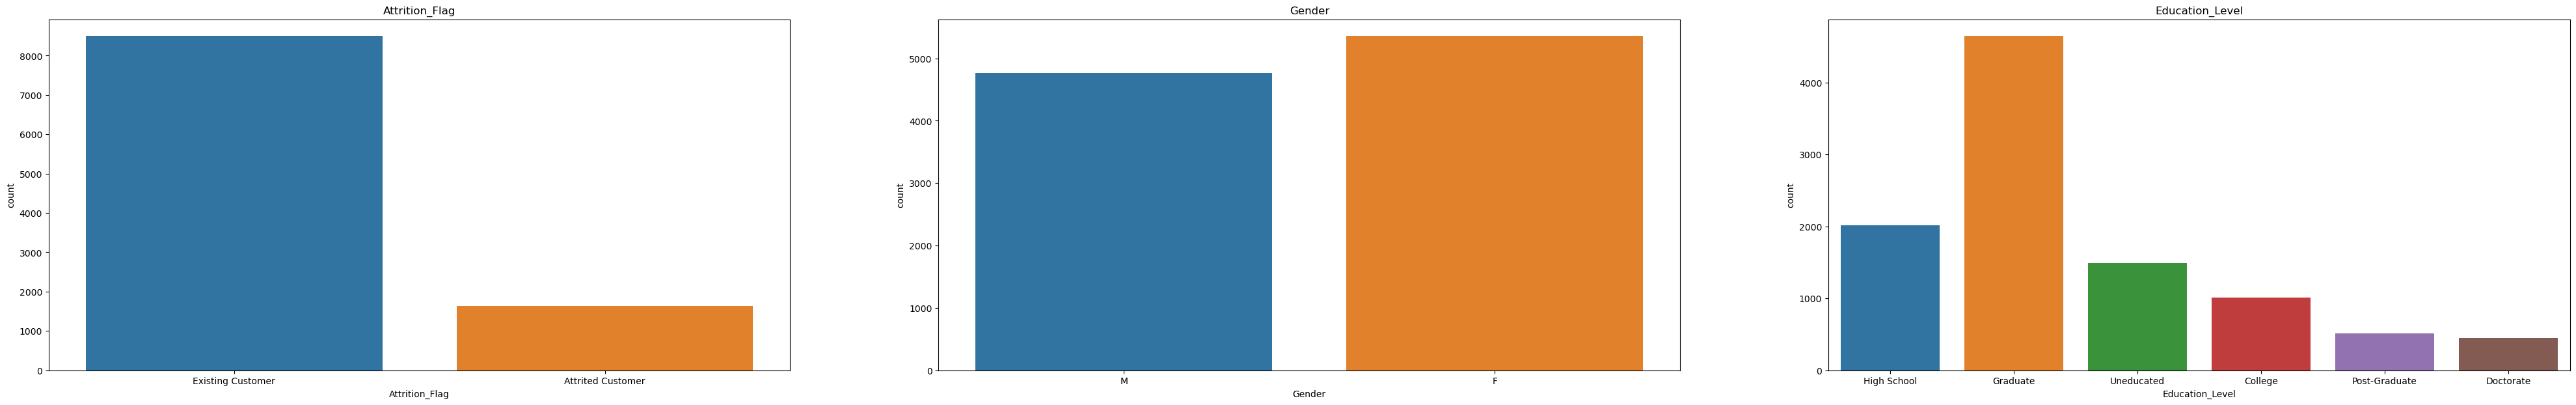

In [43]:
#Ploting countplot of 3 dif categorical features on same plane
cat_cols = ['Attrition_Flag','Gender','Education_Level']

plt.figure(figsize=(50,7))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(df,x=str(col))
    ax.set_title(f"{col}")

1. More samples of females in our dataset are compared to males, but the percentage of difference is not that significant, so we can say that genders are uniformly distributed.

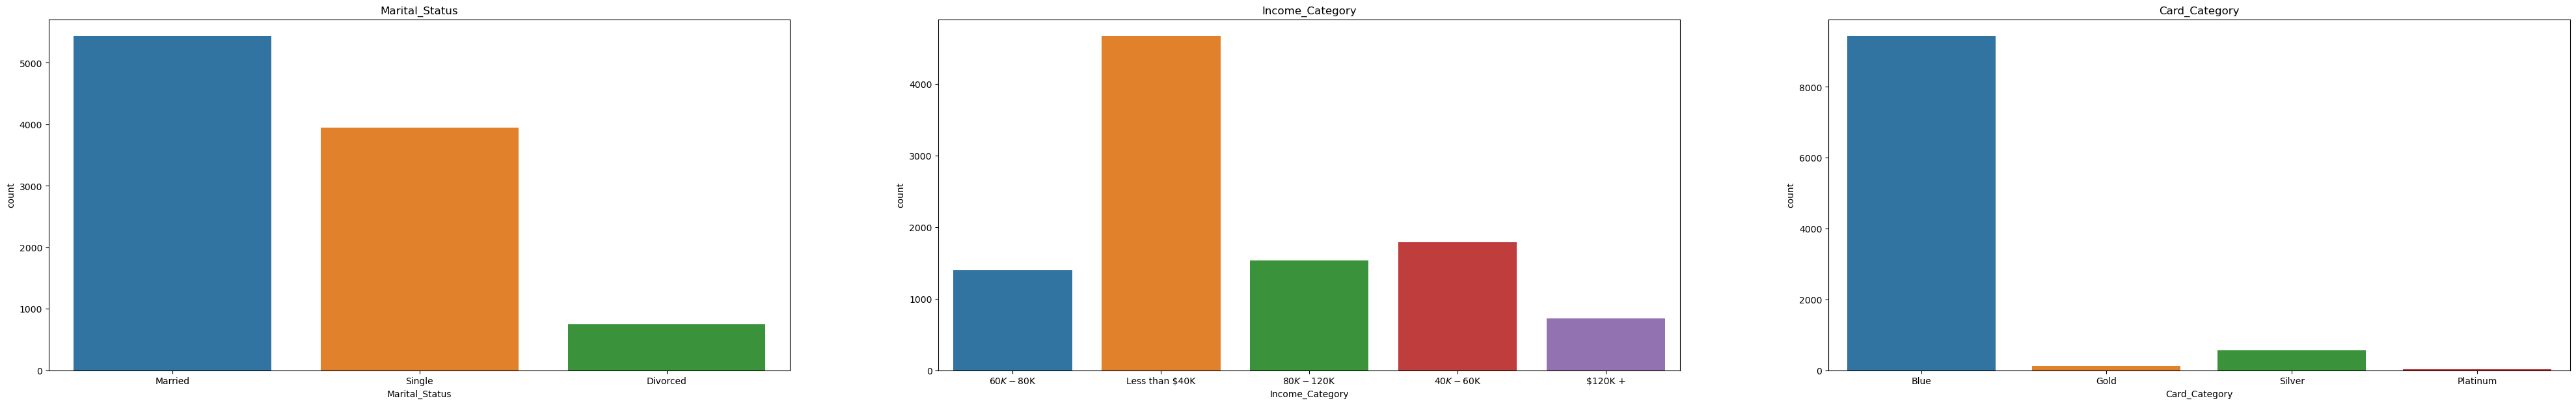

In [44]:
#Ploting countplot of 3 dif categorical features on same plane
cat_cols = ['Marital_Status','Income_Category','Card_Category']

plt.figure(figsize=(50,7))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(df,x=str(col))
    ax.set_title(f"{col}")

1. Attrition rate is 16.07%
2. Gender - most of the clients (52.9%) are Females.
3. Education_Level - most of the clients (45.89%) are Graduates.
4. Marital_Status - most of the clients (53.68%) are Married.
5. Inocome_Category - most of the clients (46.14%) Have an annual income of less than $40K.
6. Card_Category - most of the clients (93.18%) Have a Blue credit card.


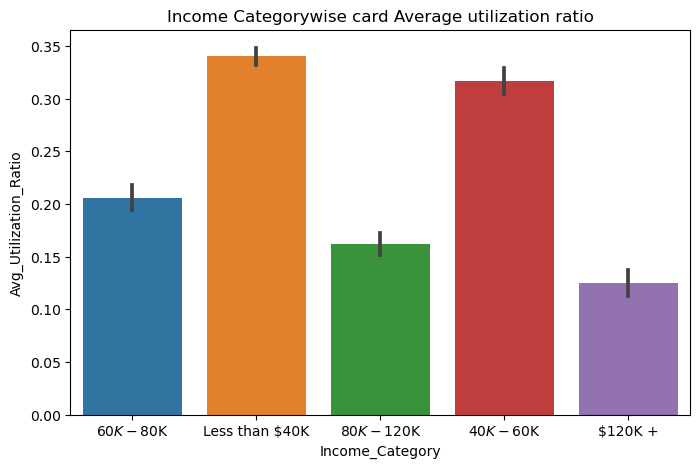

In [45]:
#Ploting barplot of Income_Category vs Avg_Utilization_Ratio
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Income_Category", y="Avg_Utilization_Ratio", data=df)
plt.title("Income Categorywise card Average utilization ratio")
plt.show()

**From above graph we can clearly see that the customers are divided in to following four category-
1.Low income High expenditure 
2.Low income Low expenditure 
3.High income High expenditure
4.Low income High expenditure**

**Dominance of one group shows that Customers with Low income High expenditure (Less than 40K Dollar) are target customer for credit cards.**

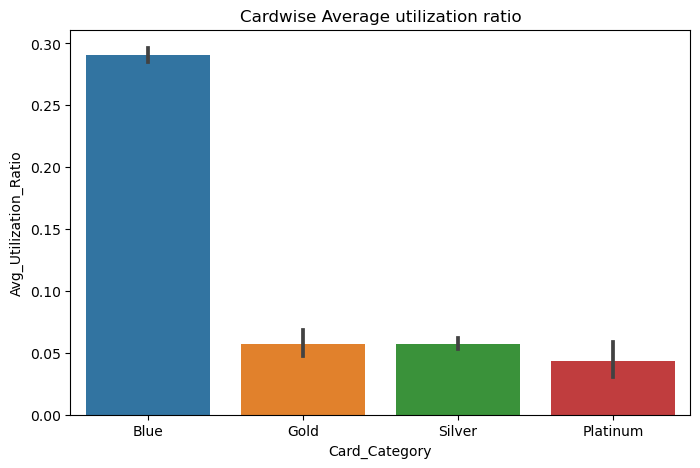

In [46]:
#Ploting barplot of Card_Category vs Avg_Utilization_Ratio
plt.figure(figsize=(8, 5))
sns.barplot(x="Card_Category", y="Avg_Utilization_Ratio", data=df)
plt.title("Cardwise Average utilization ratio")
plt.show()

**From above graph we can clearly see that the there four categories in credit card-
1.Blue Card
2.Gold Card
3.Silver Card
4.Platinum Card**

**Dominance of Blue card group shows that the Customers having blue card has more utilization rate of credit card**

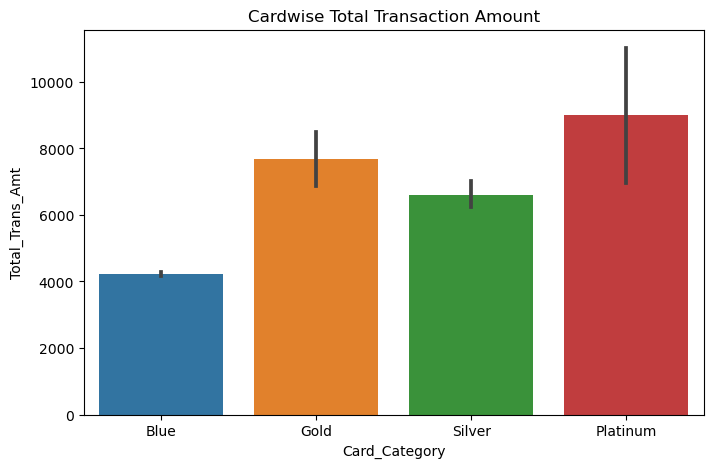

In [47]:
#Ploting barplot of Card_Category vs Total_Trans_Amt
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Card_Category", y="Total_Trans_Amt", data=df,)
plt.title("Cardwise Total Transaction Amount")
plt.show()

**from bove graph we understood the Platinum and Gold category customers are the High value customer whose transaction amount is large.**

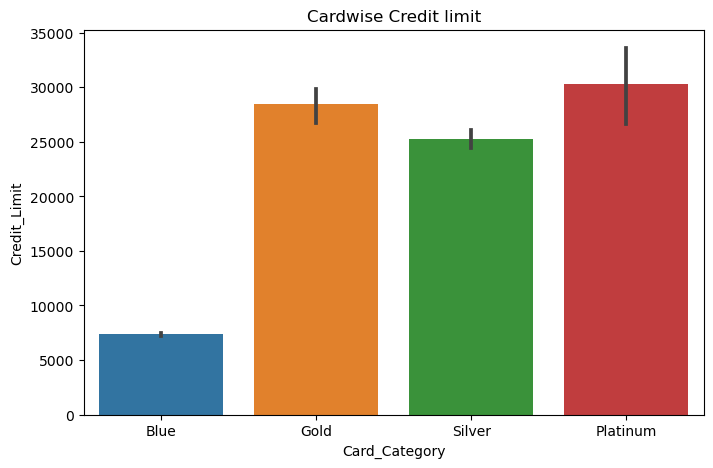

In [48]:
#Ploting barplot of Card_Category vs Credit_Limit
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Card_Category", y="Credit_Limit", data=df)
plt.title("Cardwise Credit limit")
plt.show()

**From graph and in generally also we all know the high value customers are platinum holders followed by Gold, Silver & Blue.**

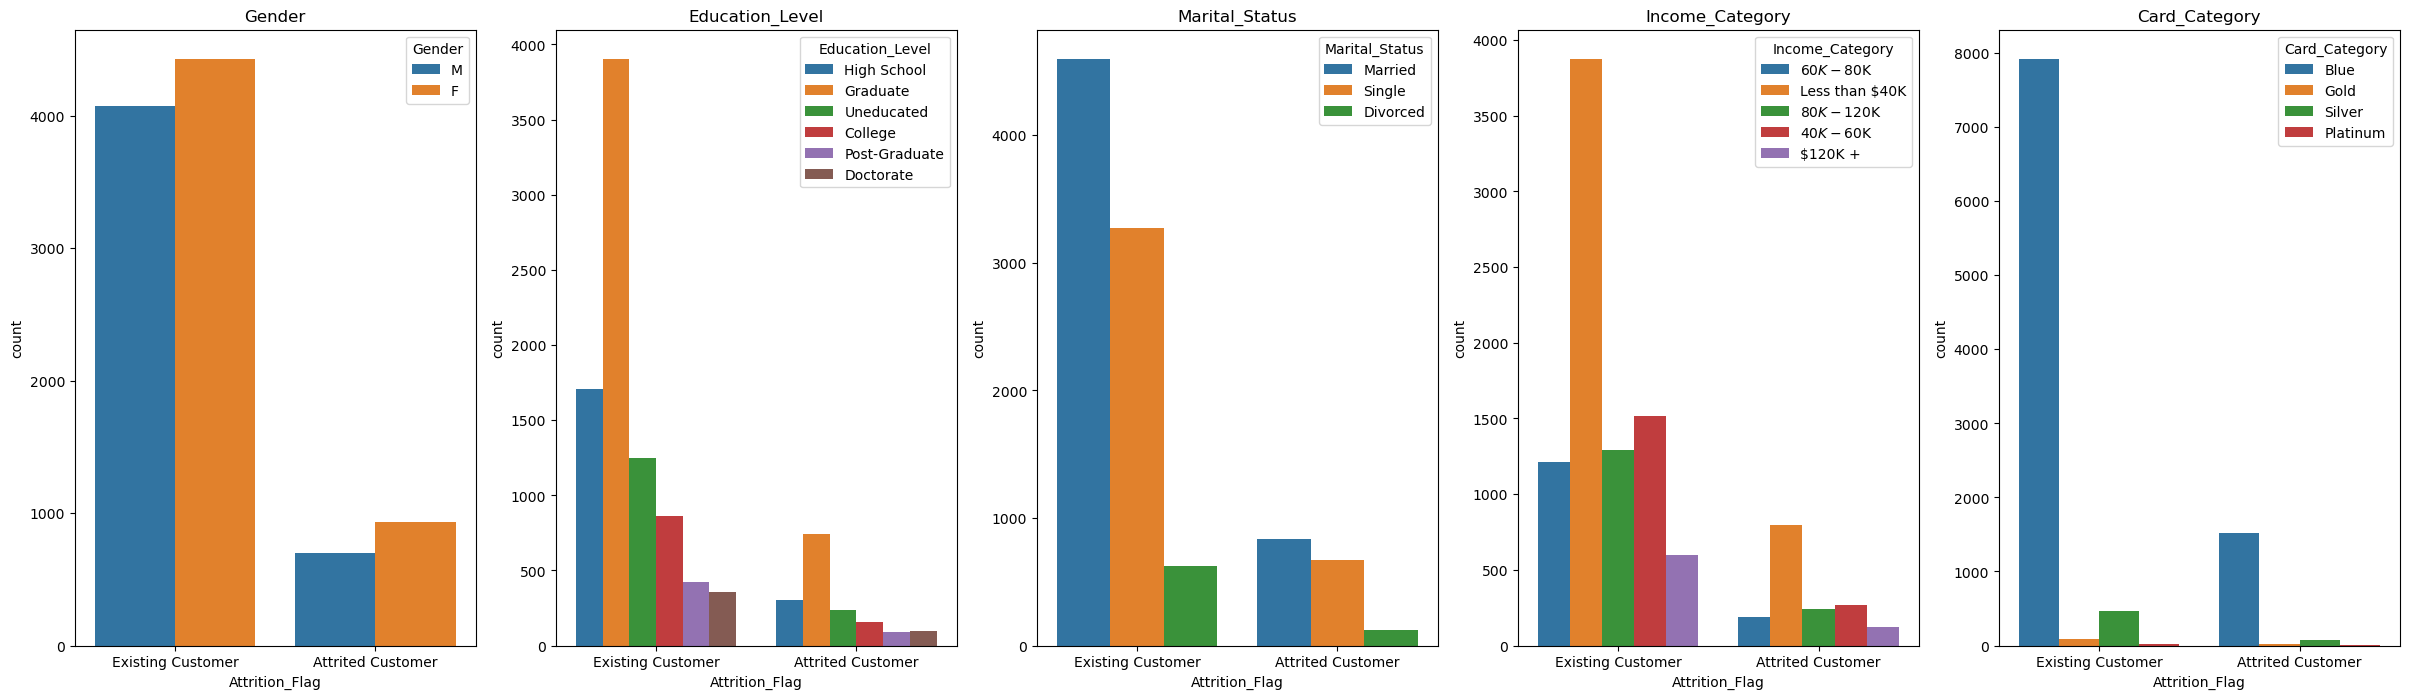

In [49]:
#Ploting countplot of 5 dif categorical features on target 
cat_cols= ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

plt.figure(figsize=(30,8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(1, len(cat_cols), i+1)
    sns.countplot(df,x ="Attrition_Flag", hue = str(col))
    ax.set_title(f"{col}")

**The below conclusions are on 16.1% attrition rate.**
1. Gender - Female clients have a slightly higher  (57.16%) Attrition rate.
2. Education_Level - Graduate clients have a slightly higher (45.67%) Attrition rate
3. Marital_Status – Married Clients have a slightly higher (51.5%) Attrition rate.
4. Income_Category - Clients with less than 40000 dollar income have a slightly higher (49.11%) Attrition rate
5. Card_Category - Blue and silver card clients have a slightly higher (98.4%) Attrition rate than the gold and platinum.

*************************************************************************************************************

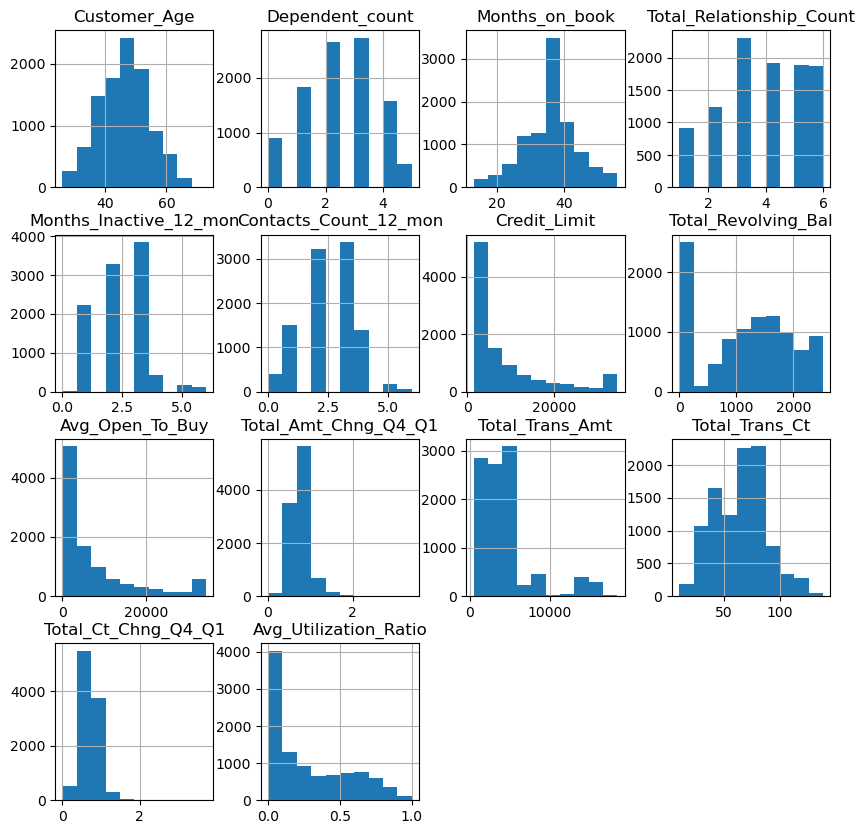

In [50]:
#Distribution of continuous data
p = df.hist(figsize=(10,10))

1. We can see that the distribution of customer ages in our dataset follows a fairly normal distribution; thus, further use of the age feature can be done with the normality assumption.
2. The distribution of Dependent counts is fairly normally distributed with a slight right skew.
3. We have a very flat shaped distribution in month_on_book (as shown in the plots above as well), meaning we cannot assume normality of the feature.
4. The distribution of the total_relationship_count ie. total number of products held by the customer seems closer to a uniform distribution.
5. Above all the features are right skewed.
6. Credit Limit & Avg_Open_to_Buy are highly correlated hence we can drop these two columns to avoid multicollinearity issue.

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

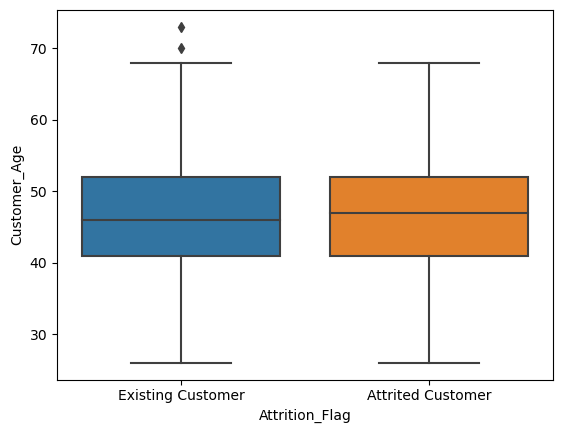

In [51]:
sns.boxplot(x='Attrition_Flag',data=df,y='Customer_Age')

<Axes: xlabel='Attrition_Flag', ylabel='Dependent_count'>

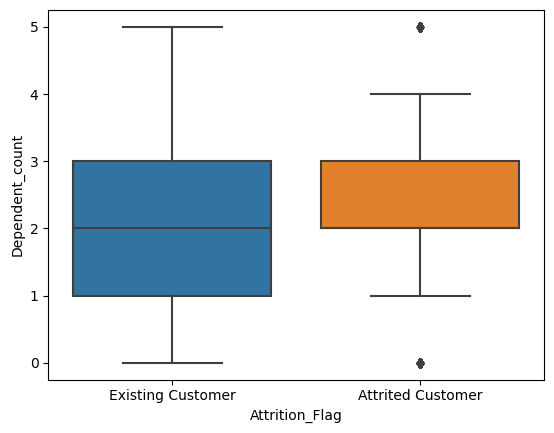

In [52]:
sns.boxplot(x='Attrition_Flag',data=df,y='Dependent_count')

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

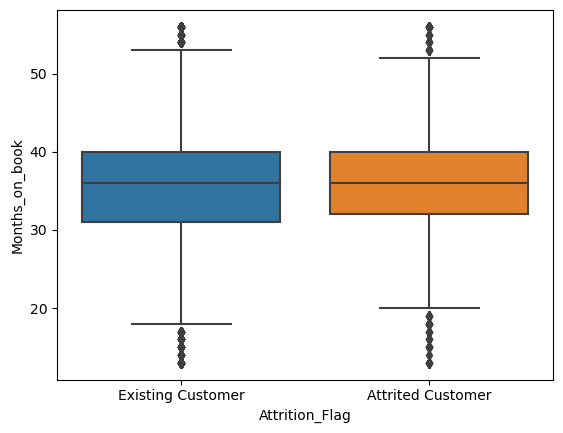

In [53]:
sns.boxplot(x='Attrition_Flag',data=df,y='Months_on_book')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

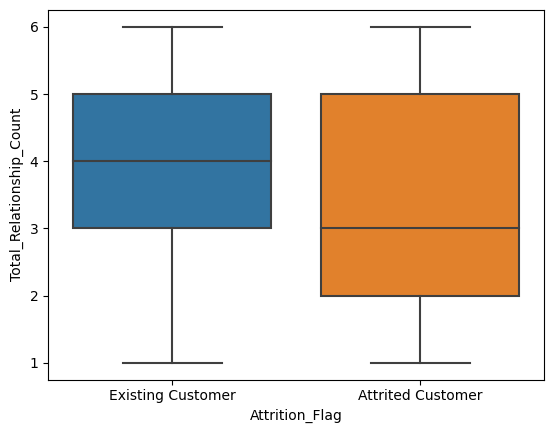

In [54]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Relationship_Count')

<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

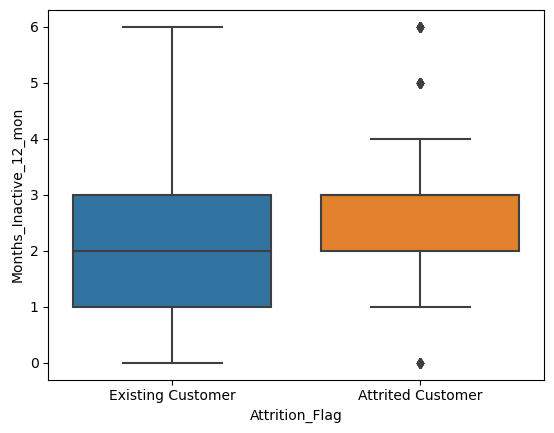

In [55]:
sns.boxplot(x='Attrition_Flag',data=df,y='Months_Inactive_12_mon')

<Axes: xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

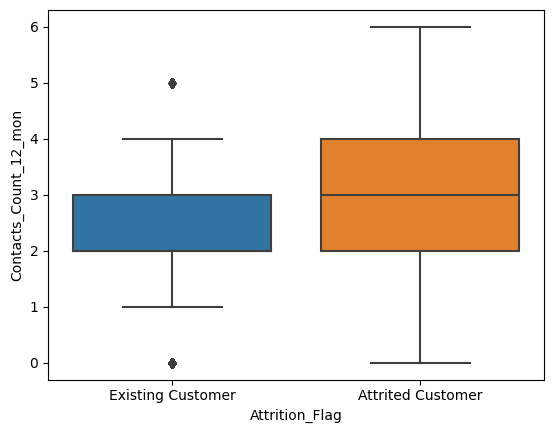

In [56]:
sns.boxplot(x='Attrition_Flag',data=df,y='Contacts_Count_12_mon')

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

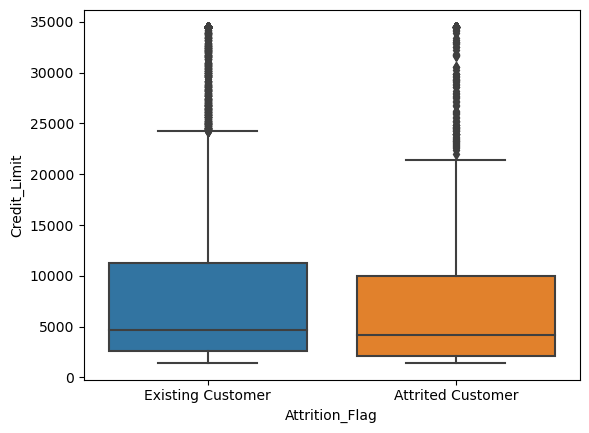

In [57]:
sns.boxplot(x='Attrition_Flag',data=df,y='Credit_Limit')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

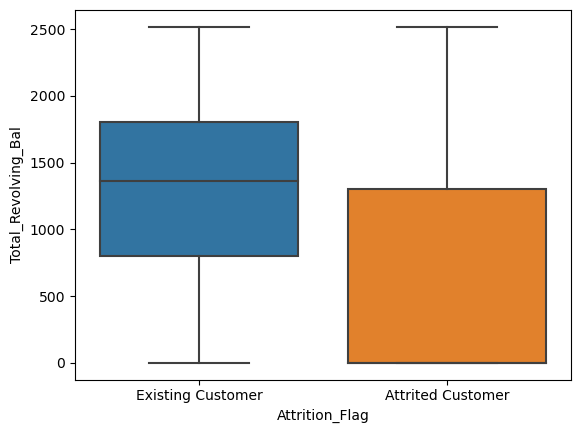

In [58]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Revolving_Bal')

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

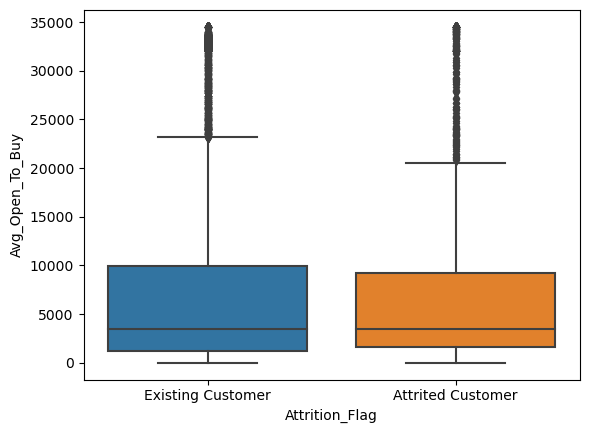

In [59]:
sns.boxplot(x='Attrition_Flag',data=df,y='Avg_Open_To_Buy')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

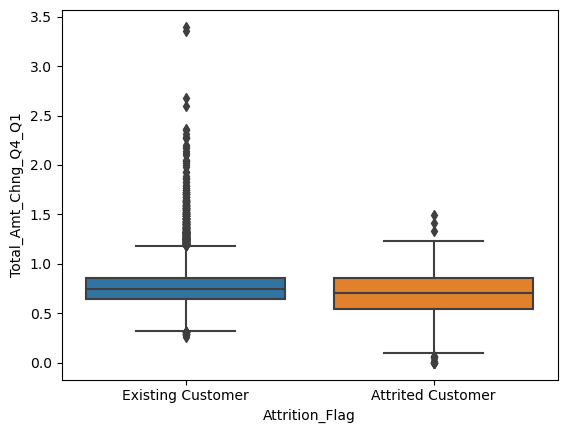

In [60]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Amt_Chng_Q4_Q1')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

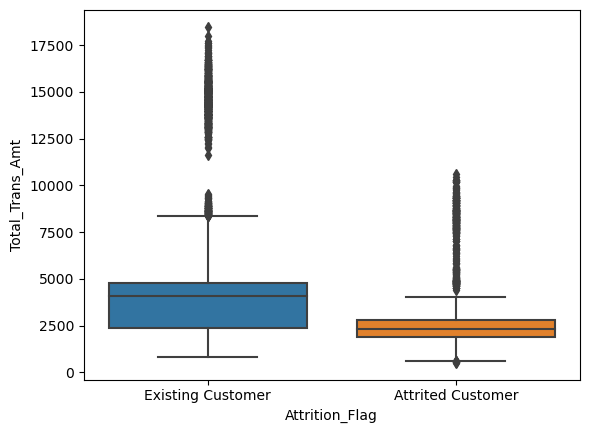

In [61]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Trans_Amt')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

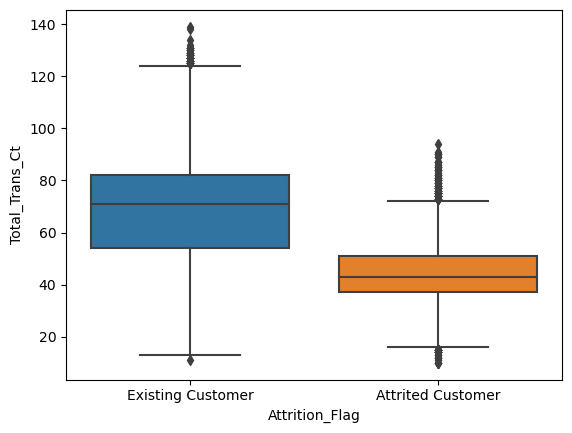

In [62]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Trans_Ct')

<Axes: xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

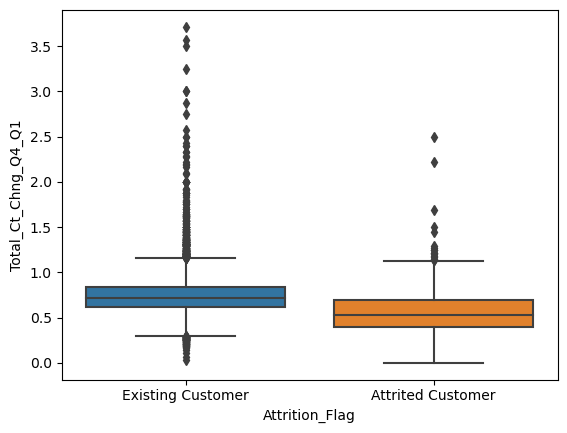

In [63]:
sns.boxplot(x='Attrition_Flag',data=df,y='Total_Ct_Chng_Q4_Q1')

<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

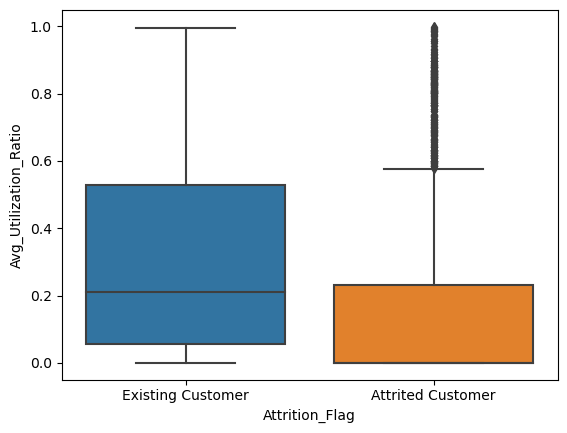

In [64]:
sns.boxplot(x='Attrition_Flag',data=df,y='Avg_Utilization_Ratio')

<Axes: >

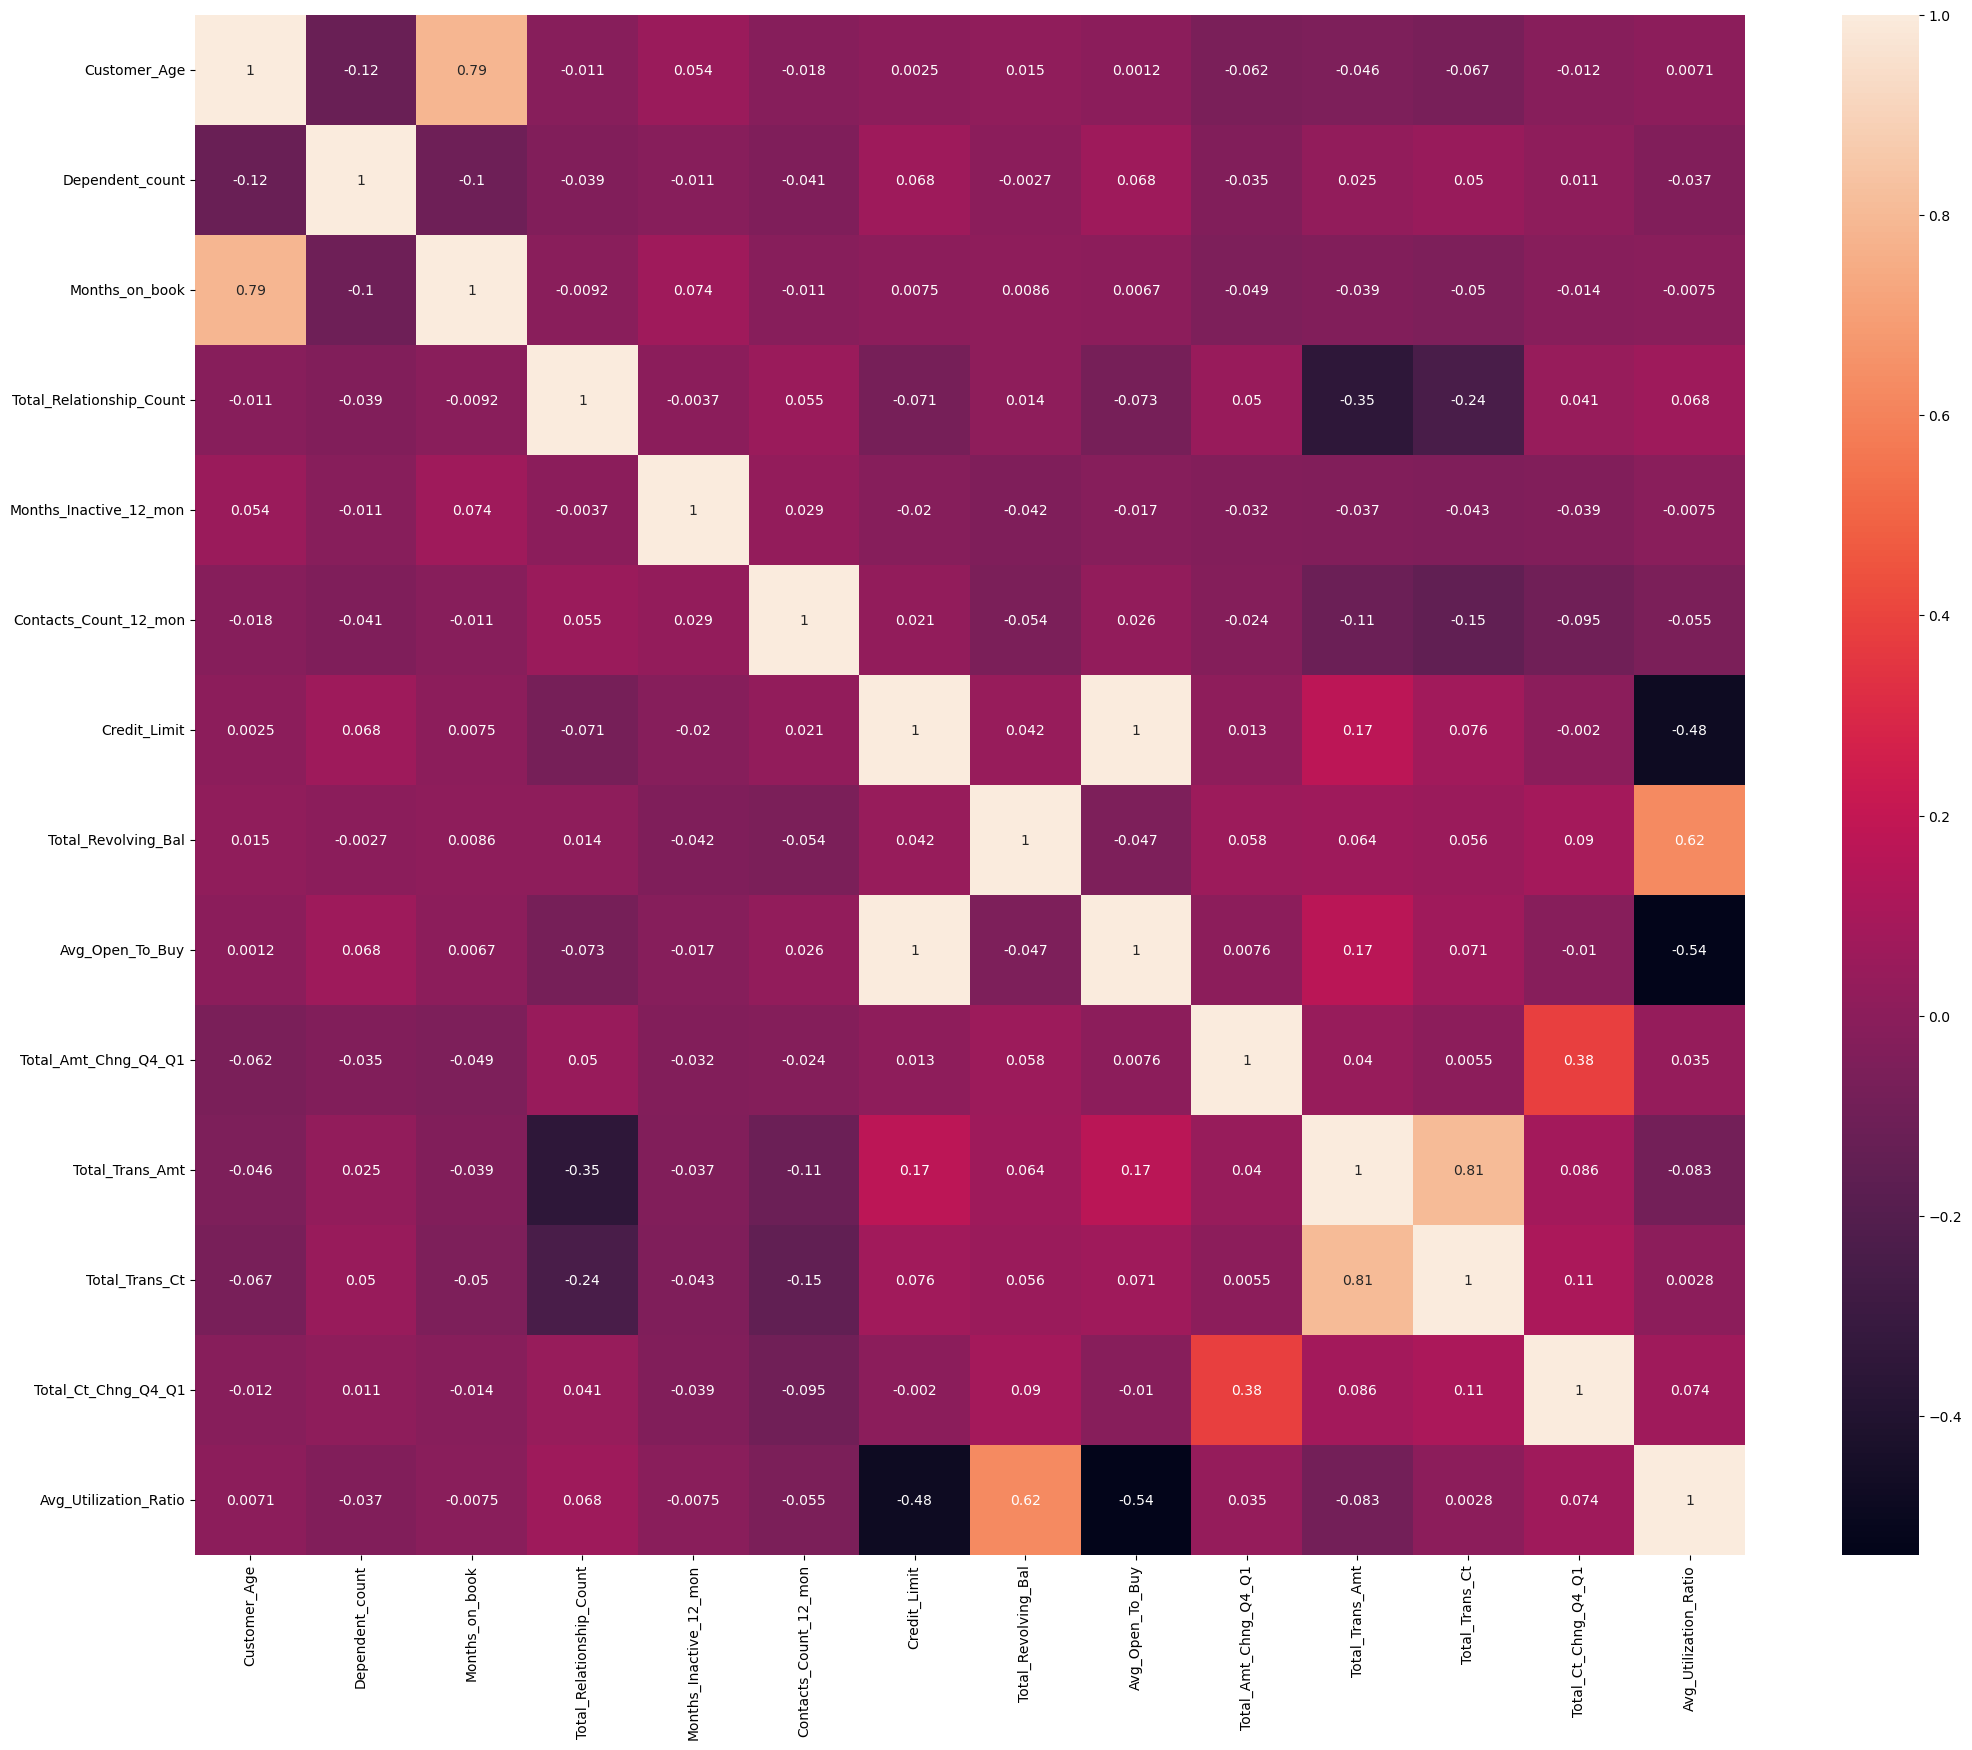

In [65]:
#Preparing Heatmap to check corelation within attributes and with target
df.copy = df.drop(['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1)
plt.figure(figsize = (25,20))
sns.heatmap(df.copy.corr(),annot = True)

Observations :

'Avg_open_to_buy' and 'Credit_Limit' are highly correlated.

'Total_Trans_Amt' and 'Total_Trans_Ct' are closely correlated.

'Customer_Age' and 'Months_on_book are closely correlated.

'Total_Revolving_Bal', 'Credit_Limit' and 'Avg_open_to_buy' all seem to be connect to the 'Avg_Utilization_Ratio'.


************************************************************************************************************************

<h3> Solution: 2. To predict for those who are going to get churned so Bank can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

<h3>Step 5 : Feature Selection

In [66]:
#From above observations we can drop highly correlated columns to avoid multicollinearity or overfitting issue
df = df.drop(['Avg_Open_To_Buy','Credit_Limit'],axis=1)

In [67]:
#As we have string caterorical data in target hence we are replacing with binary 1 & 0 classification 
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

<h3> Step 6: Encoding 

In [68]:
#getting all string object into boolean data & dropping fist column to avoid dummy trap variable
df = pd.get_dummies(df,drop_first=True)

In [69]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,777,1.335,1144,...,False,True,False,False,True,False,False,False,False,False
1,0,49,5,44,6,1,2,864,1.541,1291,...,False,False,True,False,False,False,True,False,False,False
2,0,51,3,36,4,1,0,0,2.594,1887,...,False,True,False,False,False,True,False,False,False,False
3,0,40,4,34,3,4,1,2517,1.405,1171,...,False,True,False,False,False,False,True,False,False,False
4,0,40,3,21,5,1,0,0,2.175,816,...,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,1851,0.703,15476,...,False,False,True,True,False,False,False,False,False,False
10123,1,41,2,25,4,2,3,2186,0.804,8764,...,False,False,False,True,False,False,False,False,False,False
10124,1,44,1,36,5,3,4,0,0.819,10291,...,False,True,False,False,False,False,True,False,False,False
10125,1,30,2,36,4,3,3,0,0.535,8395,...,False,True,False,True,False,False,False,False,False,False


************************************************************************************************************

<h3>Step 7 : Preparing data for Classifier Models

In [70]:
#separete independent and dependent data
X = df.drop('Attrition_Flag', axis = 1)
Y= df['Attrition_Flag'].values

In [71]:
X

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,777,1.335,1144,42,...,False,True,False,False,True,False,False,False,False,False
1,49,5,44,6,1,2,864,1.541,1291,33,...,False,False,True,False,False,False,True,False,False,False
2,51,3,36,4,1,0,0,2.594,1887,20,...,False,True,False,False,False,True,False,False,False,False
3,40,4,34,3,4,1,2517,1.405,1171,20,...,False,True,False,False,False,False,True,False,False,False
4,40,3,21,5,1,0,0,2.175,816,28,...,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,1851,0.703,15476,117,...,False,False,True,True,False,False,False,False,False,False
10123,41,2,25,4,2,3,2186,0.804,8764,69,...,False,False,False,True,False,False,False,False,False,False
10124,44,1,36,5,3,4,0,0.819,10291,60,...,False,True,False,False,False,False,True,False,False,False
10125,30,2,36,4,3,3,0,0.535,8395,62,...,False,True,False,True,False,False,False,False,False,False


In [72]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
#the distribution of few columns are quite dominating, so we need to scale our values
#Scaling independent variable using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X = mc.fit_transform(X)

In [74]:
X

array([[0.40425532, 0.6       , 0.60465116, ..., 0.        , 0.        ,
        0.        ],
       [0.4893617 , 1.        , 0.72093023, ..., 0.        , 0.        ,
        0.        ],
       [0.53191489, 0.6       , 0.53488372, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38297872, 0.2       , 0.53488372, ..., 0.        , 0.        ,
        0.        ],
       [0.08510638, 0.4       , 0.53488372, ..., 0.        , 0.        ,
        0.        ],
       [0.36170213, 0.4       , 0.27906977, ..., 0.        , 0.        ,
        1.        ]])

****************************************************************************************************************

<h3>Step 8: Applying Predictive Models

<h3>1. Logistic Regression 

In [75]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [76]:
#Fitting Logistic Regression Model on training data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [77]:
#Predicting result on test data
Y_predict = lr.predict(X_test)

In [78]:
#Checking confusion matrix array on actual values & predicted values.
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[1649,   46],
       [ 151,  180]], dtype=int64)

In [79]:
#Checking classification report 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1695
           1       0.80      0.54      0.65       331

    accuracy                           0.90      2026
   macro avg       0.86      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



In [80]:
lr_f1 = metrics.f1_score(Y_test,Y_predict)
lr_precision = metrics.precision_score(Y_test,Y_predict)
lr_recall = metrics.recall_score(Y_test,Y_predict)
lr_accuracy = metrics.accuracy_score(Y_test,Y_predict)

In [81]:
print(lr_f1, lr_precision, lr_recall, lr_accuracy)

0.6463195691202872 0.7964601769911505 0.5438066465256798 0.9027640671273445


In [82]:
Y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
#Cross validate the reult for diff cut n fold methods.  
from sklearn.model_selection import cross_val_score  

cross_val_score (lr, X, Y, cv = 8)

array([0.82938389, 0.83649289, 0.90837283, 0.92101106, 0.89968404,
       0.92969984, 0.89968404, 0.86245059])

**************************************************************************************************************************

<h3>2. KNN

In [85]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [87]:
#to find the optimal value of K
x=[]
y=[]
for i in range(1,45,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train,cv=5)
    x.append(i)
    y.append(max(score))

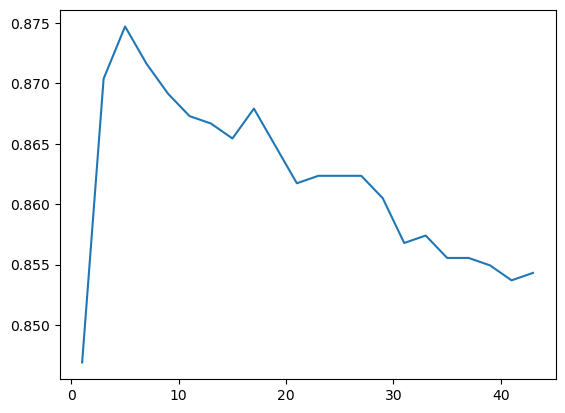

In [88]:
plt.plot(x,y)
plt.show()

In [89]:
#to find the optimal value of K
x_new=[]
y_new=[]
for i in range(1,45,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_test,Y_test,cv=5)
    x_new.append(i)
    y_new.append(max(score))

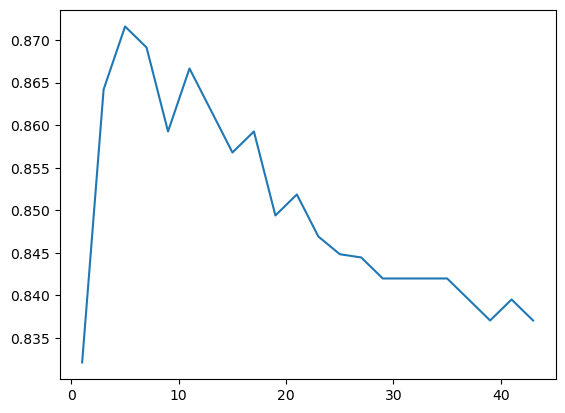

In [90]:
plt.plot(x_new,y_new)
plt.show()

In [91]:
#From above graph we understood the best result we can get with n_neighbors=5 
#Fitting Ranfom Forest Model on training data with 40 no. of trees
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [92]:
Y_predict = knn.predict(X_test)
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
Y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
#Checking confusion matrix array on actual values & predicted values.
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[1653,   42],
       [ 201,  130]], dtype=int64)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1695
           1       0.76      0.39      0.52       331

    accuracy                           0.88      2026
   macro avg       0.82      0.68      0.72      2026
weighted avg       0.87      0.88      0.86      2026



In [96]:
knn_f1 = metrics.f1_score(Y_test,Y_predict)
knn_precision = metrics.precision_score(Y_test,Y_predict)
knn_recall = metrics.recall_score(Y_test,Y_predict)
knn_accuracy = metrics.accuracy_score(Y_test,Y_predict)

In [97]:
print(knn_f1, knn_precision, knn_recall, knn_accuracy)

0.5168986083499005 0.7558139534883721 0.39274924471299094 0.8800592300098716


In [98]:
from sklearn.model_selection import cross_val_score 

cross_val_score(knn, X, Y, cv = 8)


array([0.85466035, 0.84913112, 0.88309637, 0.88388626, 0.86808847,
       0.90442338, 0.85466035, 0.85059289])

**Disadvantage: 
1. KNN is Lazy learner model (Stored the training data but when test appear that time it start building model, hence it take more time in prediction).
2. Overfitting Problem.
3. To find optimal K value, Large computation cost during runtime if sample size is large.**

***********************************************************************************************************************

<h3>3. Random Forest

In [99]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [100]:
#Fitting Ranfom Forest Model on training data with 40 no. of trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [101]:
#Predicting result on test data
Y_predict = rfc.predict(X_test)

In [102]:
Y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
#To compare predicted & actual data
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

array([[1678,   17],
       [  66,  265]], dtype=int64)

In [105]:
#Checking confusion matrix array on actual values & predicted values.
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1695
           1       0.94      0.80      0.86       331

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [106]:
rfc_f1 = metrics.f1_score(Y_test,Y_predict)
rfc_precision = metrics.precision_score(Y_test,Y_predict)
rfc_recall = metrics.recall_score(Y_test,Y_predict)
rfc_accuracy = metrics.accuracy_score(Y_test,Y_predict)
print(rfc_f1, rfc_precision, rfc_recall, rfc_accuracy)

0.864600326264274 0.9397163120567376 0.8006042296072508 0.9590325765054294


In [107]:
#Cross validate the reult for diff cut n fold methods.  
from sklearn.model_selection import cross_val_score 
cross_val_score(rfc, X, Y, cv = 8)

array([0.87756714, 0.92417062, 0.96208531, 0.96366509, 0.95655608,
       0.97314376, 0.93917852, 0.89328063])

<h3>Comparing all 3 models accuracy

In [108]:
print("KNN Model Accuracy:",knn_accuracy, "LR Model Accuracy:",lr_accuracy, "RF Model Accuracy:", rfc_accuracy)

KNN Model Accuracy: 0.8800592300098716 LR Model Accuracy: 0.9027640671273445 RF Model Accuracy: 0.9590325765054294


<h3> Conclusion: For prediction the best suited model for this dataset is Random Forest as we got 96% accuracy and from the cross validation score we observed that we can achieve up to 97.00% accuracy.
    

<h1> <center> Thank You